## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,DATE,TAG,POSTS
2588,2024-02-01 00:00:00,php,1428
2589,2024-02-01 00:00:00,python,8379
2590,2024-02-01 00:00:00,r,1854
2591,2024-02-01 00:00:00,ruby,160
2592,2024-02-01 00:00:00,swift,708


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2593 non-null   object
 1   TAG     2593 non-null   object
 2   POSTS   2593 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 60.9+ KB


Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [17]:
df.shape

(2593, 3)

Count the number of entries in each column of the dataframe

In [18]:
df.count()

DATE     2593
TAG      2593
POSTS    2593
dtype: int64

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [31]:
df[["TAG", "POSTS"]].groupby('TAG').sum().sort_values('POSTS', ascending=False).head(10)

,POSTS
TAG,
javascript,2523746
python,2183896
java,1914086
c#,1612141
php,1462795
c++,805079
r,503799
c,403075
swift,332611


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry? 


In [34]:
df.groupby('TAG').count().sort_values('POSTS', ascending=False).head(10)

,DATE,POSTS
TAG,,
c#,188,188
assembly,187,187
c,187,187
c++,187,187
delphi,187,187
java,187,187
javascript,187,187
perl,187,187
php,187,187


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [35]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [36]:
type(df['DATE'][1])

str

In [37]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164


## Data Manipulation



In [40]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,172.0,970.0,3185.0,1712.0,165.0,421.0,3426.0,5461.0,53.0,1540.0,9012.0,2063.0,194.0,903.0
2023-11-01,172.0,958.0,3112.0,1469.0,103.0,409.0,3279.0,5192.0,44.0,1400.0,8466.0,1997.0,154.0,865.0
2023-12-01,181.0,877.0,2646.0,1429.0,75.0,326.0,2541.0,4778.0,53.0,1208.0,7010.0,1605.0,154.0,743.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [41]:
reshaped_df.shape

(188, 14)

In [42]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN


In [43]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-10-01,172.0,970.0,3185.0,1712.0,165.0,421.0,3426.0,5461.0,53.0,1540.0,9012.0,2063.0,194.0,903.0
2023-11-01,172.0,958.0,3112.0,1469.0,103.0,409.0,3279.0,5192.0,44.0,1400.0,8466.0,1997.0,154.0,865.0
2023-12-01,181.0,877.0,2646.0,1429.0,75.0,326.0,2541.0,4778.0,53.0,1208.0,7010.0,1605.0,154.0,743.0
2024-01-01,176.0,825.0,2696.0,1584.0,90.0,345.0,2865.0,5144.0,34.0,1401.0,7785.0,1812.0,163.0,871.0
2024-02-01,140.0,796.0,2888.0,1618.0,118.0,339.0,3122.0,5034.0,37.0,1428.0,8379.0,1854.0,160.0,708.0


In [44]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

Count the number of entries per programming language. Why might the number of entries be different?

In [46]:
reshaped_df.count()

TAG
assembly      187
c             187
c#            188
c++           187
delphi        187
go            172
java          187
javascript    187
perl          187
php           187
python        187
r             185
ruby          187
swift         178
dtype: int64

Replace NaN values with 0

In [47]:
reshaped_df.fillna(0, inplace=True)

In [48]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,604.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,497.0,448.0,1.0,157.0,0.0


In [49]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

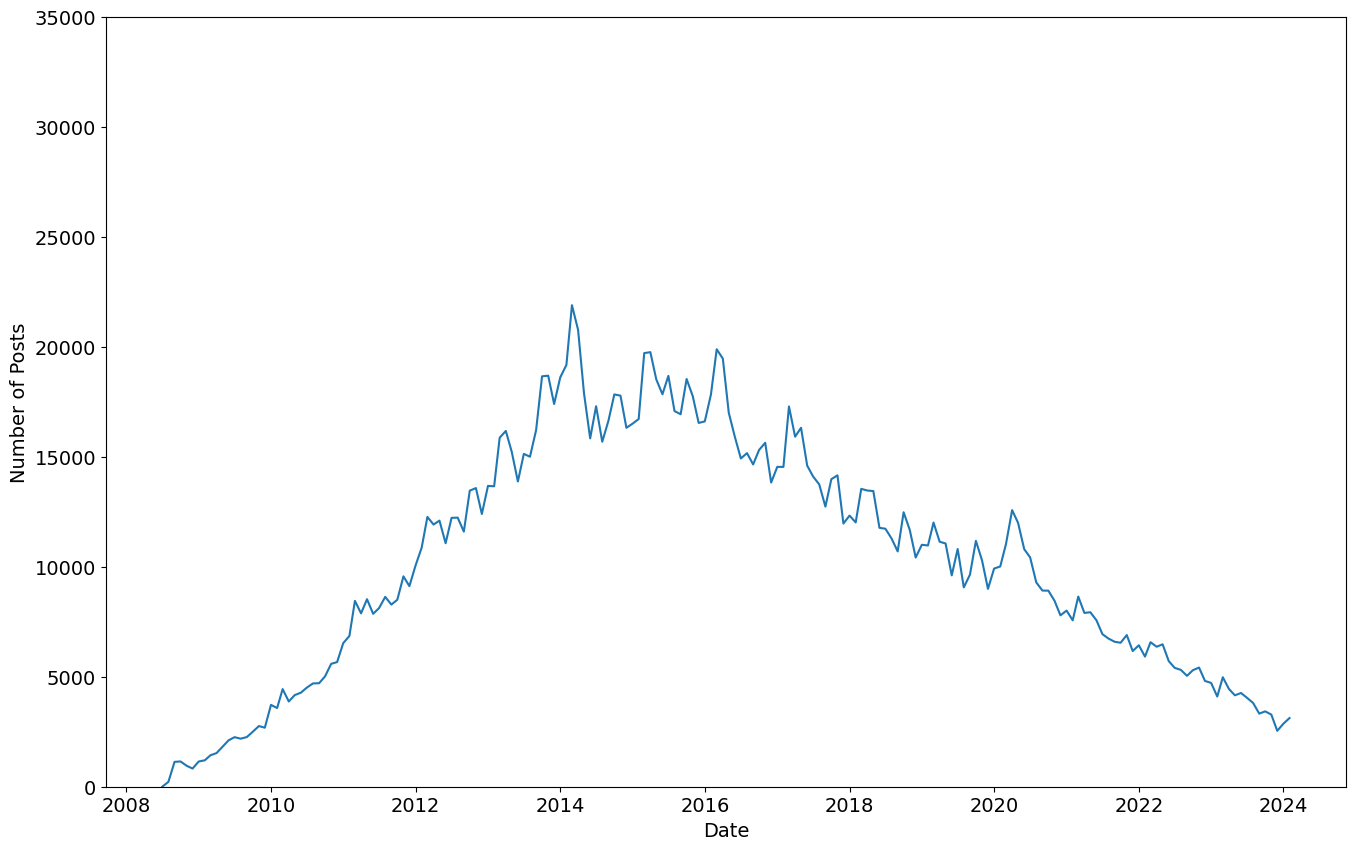

In [61]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'], label='java')
plt.show()

Show two line (e.g. for Java and Python) on the same chart.

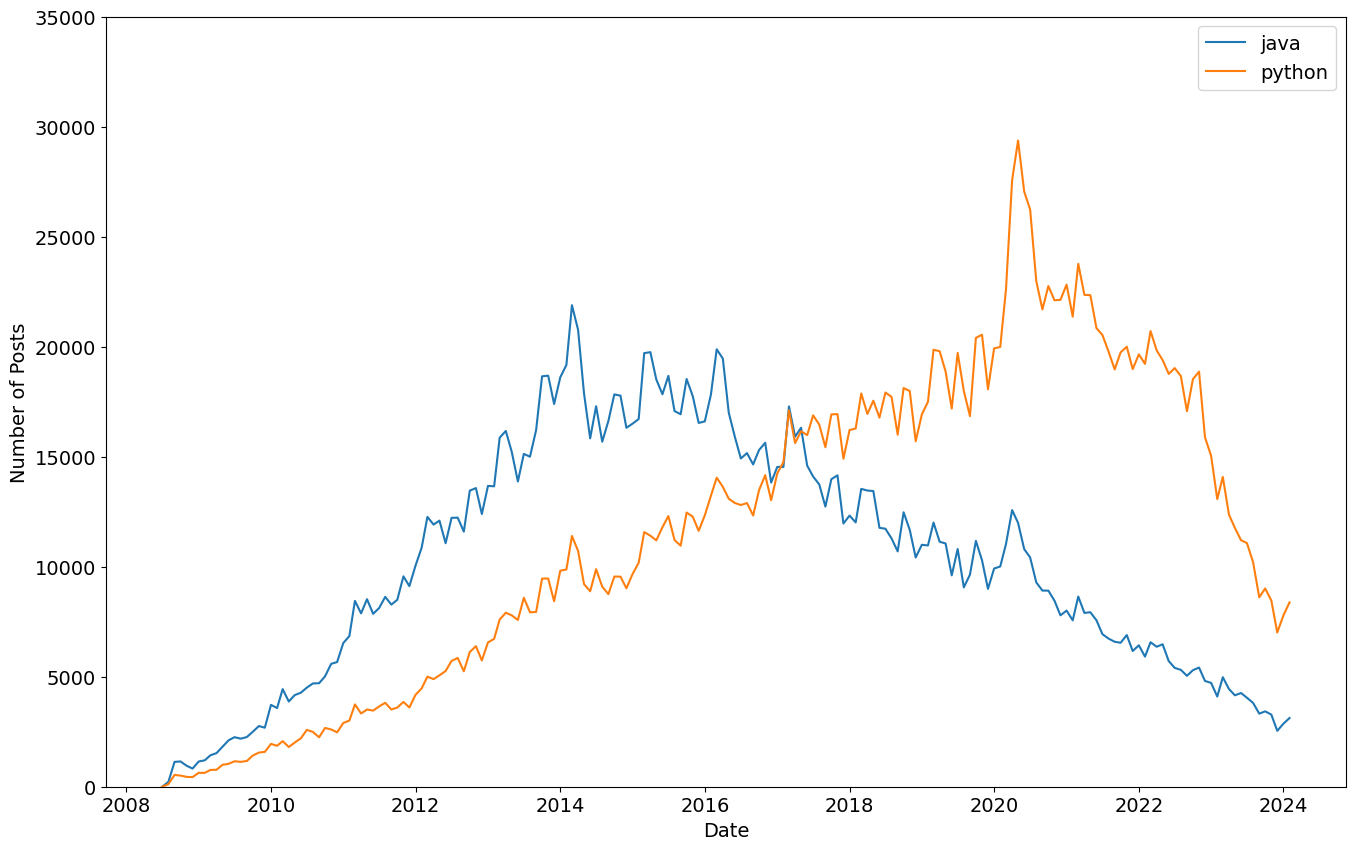

In [63]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'], label='java')
plt.plot(reshaped_df.index, reshaped_df['python'], label='python')
plt.legend(fontsize=14)
plt.show()

Plotting all Tags

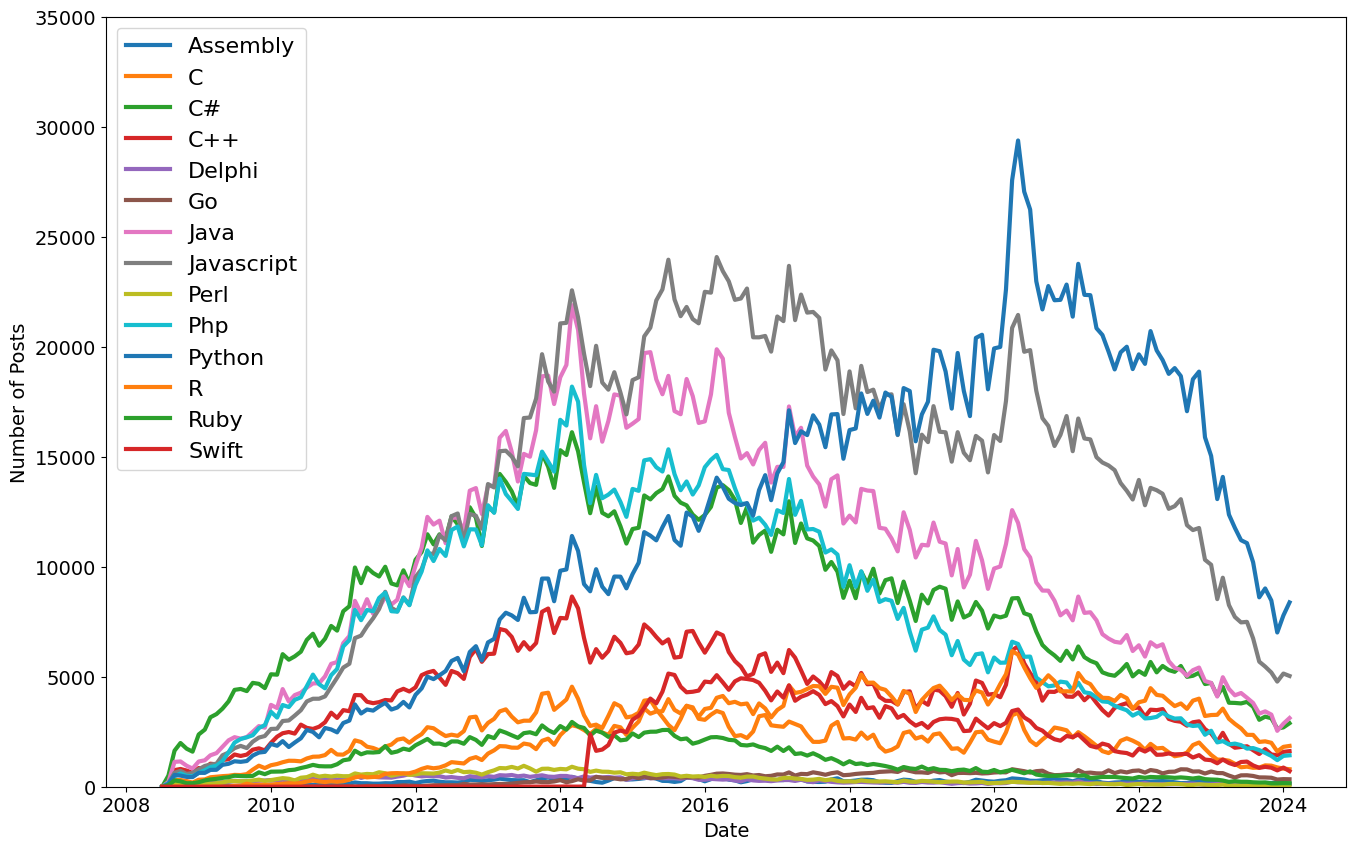

In [66]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=f'{column}'.capitalize())
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [71]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=8).mean()

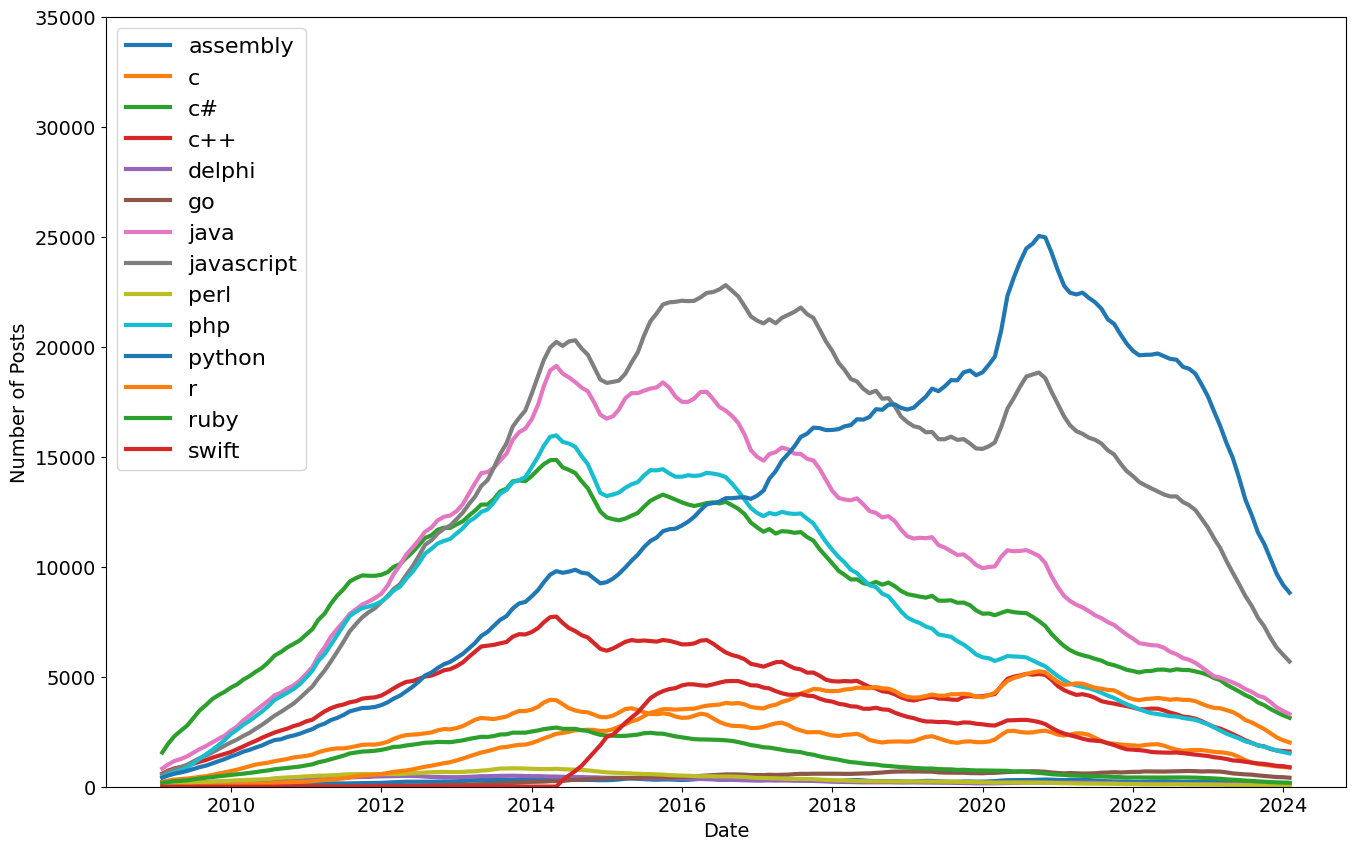

In [72]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=column)

plt.legend(fontsize=16)
plt.show()

## Q&As

Looking at the data, what was the most popular programming language from 2008 to 2012 by the number of posts?

In [73]:
df_2008_to_2012 = df[(df['DATE'] >= '2008-01-01') & (df['DATE'] <= '2012-12-31')]
most_popular_language = df_2008_to_2012.groupby('TAG')['POSTS'].sum().idxmax()
most_popular_language

'c#'

What was the most popular programming language from 2015 to 2018?

In [74]:
df_2015_to_2018 = df[(df['DATE'] >= '2015-01-01') & (df['DATE'] <= '2018-12-31')]
most_popular_language = df_2015_to_2018.groupby('TAG')['POSTS'].sum().idxmax()
most_popular_language

'javascript'

What was the most popular programming language in 2020?

In [75]:
most_popular_language_2020 = df[df['DATE'].dt.year == 2020].groupby('TAG')['POSTS'].sum().idxmax()
most_popular_language_2020


'python'